In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder

In [2]:
#load data
car_data = pd.read_csv("C:/Users/Admin/Desktop/Raj/Sem-7/ML-Materials/LAB2/Exercise-CarData.csv",usecols=['Price','Age','KM','FuelType','HP','MetColor','Automatic','CC','Doors','Weight'],na_values=['????','??'])
car_data.head(10)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,three,1165
1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165
2,13950,24.0,41711.0,Diesel,90.0,NaN,0,2000,3,1165
3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165
4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170
5,12950,32.0,61000.0,Diesel,90.0,0.0,0,2000,3,1170
6,16900,27.0,NaN,Diesel,NaN,NaN,0,2000,3,1245
7,18600,30.0,75889.0,NaN,90.0,1.0,0,2000,3,1245
8,21500,27.0,19700.0,Petrol,192.0,0.0,0,1800,3,1185
9,12950,23.0,71138.0,Diesel,NaN,NaN,0,1900,3,1105


In [3]:
#Get Information
car_data.info()
car_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1336 non-null   float64
 2   KM         1421 non-null   float64
 3   FuelType   1336 non-null   object 
 4   HP         1430 non-null   float64
 5   MetColor   1286 non-null   float64
 6   Automatic  1436 non-null   int64  
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   object 
 9   Weight     1436 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 101.0+ KB


,Price,Age,KM,HP,MetColor,Automatic,CC,Weight
count,1436.000000,1336.000000,1421.000000,1430.000000,1286.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.672156,68647.239972,101.478322,0.674961,0.055710,1566.827994,1072.45961
std,3626.964585,18.589804,37333.023589,14.768255,0.468572,0.229441,187.182436,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,1000.00000
25%,8450.000000,43.000000,43210.000000,90.000000,0.000000,0.000000,1400.000000,1040.00000
50%,9900.000000,60.000000,63634.000000,110.000000,1.000000,0.000000,1600.000000,1070.00000
75%,11950.000000,70.000000,87000.000000,110.000000,1.000000,0.000000,1600.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,1615.00000


In [4]:
#remove row of empty-box values
car_data = car_data.drop(columns = ['Price'],axis=1)
car_data.head()

,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,23.0,46986.0,Diesel,90.0,1.0,0,2000,three,1165
1,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165
2,24.0,41711.0,Diesel,90.0,NaN,0,2000,3,1165
3,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165
4,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170


In [5]:
car_data.dropna(axis=0,how='any',subset=['MetColor','FuelType','Age'],inplace=True)
car_data.head(15)

,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,23.0,46986.0,Diesel,90.0,1.0,0,2000,three,1165
1,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165
3,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165
4,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170
5,32.0,61000.0,Diesel,90.0,0.0,0,2000,3,1170
8,27.0,19700.0,Petrol,192.0,0.0,0,1800,3,1185
10,25.0,31461.0,Petrol,192.0,0.0,0,1800,3,1185
11,22.0,43610.0,Petrol,192.0,0.0,0,1800,3,1185
12,25.0,32189.0,Petrol,192.0,0.0,0,1800,3,1185
13,31.0,23000.0,Petrol,192.0,1.0,0,1800,3,1185


In [6]:
#imputation (Replacing missing values with mean value of that attribute)
hp_imputer = SimpleImputer(missing_values = np.nan,strategy='mean')
hp_imputer = hp_imputer.fit(car_data.iloc[:,3:4].values)
car_data.iloc[:,3:4] = hp_imputer.transform(car_data.iloc[:,3:4].values)

km_imputer = SimpleImputer(missing_values = np.nan,strategy='mean')
km_imputer = km_imputer.fit(car_data.iloc[:,1:2].values)
car_data.iloc[:,1:2] = km_imputer.transform(car_data.iloc[:,1:2].values)

car_data.head(15)

,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,23.0,46986.0,Diesel,90.000000,1.0,0,2000,three,1165
1,23.0,72937.0,Diesel,90.000000,1.0,0,2000,3,1165
3,26.0,48000.0,Diesel,90.000000,0.0,0,2000,3,1165
4,30.0,38500.0,Diesel,90.000000,0.0,0,2000,3,1170
5,32.0,61000.0,Diesel,90.000000,0.0,0,2000,3,1170
8,27.0,19700.0,Petrol,192.000000,0.0,0,1800,3,1185
10,25.0,31461.0,Petrol,192.000000,0.0,0,1800,3,1185
11,22.0,43610.0,Petrol,192.000000,0.0,0,1800,3,1185
12,25.0,32189.0,Petrol,192.000000,0.0,0,1800,3,1185
13,31.0,23000.0,Petrol,192.000000,1.0,0,1800,3,1185


In [7]:
#scale age
std_scale = MinMaxScaler()
age = car_data.iloc[:,0:1].values
car_data['Age']= std_scale.fit_transform(age)

#scale cc
std_scale = MinMaxScaler()
cc = car_data.iloc[:,6:7].values
car_data['CC']= std_scale.fit_transform(cc)

#scale weight
std_scale = MinMaxScaler()
weight = car_data.iloc[:,8:9].values
car_data['Weight']= std_scale.fit_transform(weight)

#scale km
std_scale = MinMaxScaler()
km = car_data.iloc[:,1:2].values
car_data['KM']= std_scale.fit_transform(km)

#scale hp
std_scale = MinMaxScaler()
hp = car_data.iloc[:,3:4].values
car_data['HP']= std_scale.fit_transform(hp)
car_data.head()

,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0.278481,0.193355,Diesel,0.170732,1.0,0,1.0,three,0.268293
1,0.278481,0.300149,Diesel,0.170732,1.0,0,1.0,3,0.268293
3,0.316456,0.197528,Diesel,0.170732,0.0,0,1.0,3,0.268293
4,0.367089,0.158433,Diesel,0.170732,0.0,0,1.0,3,0.276423
5,0.392405,0.251026,Diesel,0.170732,0.0,0,1.0,3,0.276423


In [8]:
car_data.describe()

,Age,KM,HP,MetColor,Automatic,CC,Weight
count,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000
mean,0.690962,0.285123,0.266165,0.675068,0.053105,0.384948,0.120114
std,0.238344,0.155902,0.122004,0.468561,0.224344,0.265622,0.085546
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.531646,0.179935,0.170732,0.000000,0.000000,0.142857,0.073171
50%,0.746835,0.262882,0.333333,1.000000,0.000000,0.428571,0.113821
75%,0.873418,0.360897,0.333333,1.000000,0.000000,0.428571,0.146341
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
#handel Doors column
car_data['Doors'] = car_data['Doors'].replace('three',3)
car_data['Doors'] = car_data['Doors'].replace('four',4)
car_data['Doors'] = car_data['Doors'].replace('five',5)
car_data.head(5)

,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0.278481,0.193355,Diesel,0.170732,1.0,0,1.0,3,0.268293
1,0.278481,0.300149,Diesel,0.170732,1.0,0,1.0,3,0.268293
3,0.316456,0.197528,Diesel,0.170732,0.0,0,1.0,3,0.268293
4,0.367089,0.158433,Diesel,0.170732,0.0,0,1.0,3,0.276423
5,0.392405,0.251026,Diesel,0.170732,0.0,0,1.0,3,0.276423


In [10]:
car_data['Doors'] = car_data['Doors'].astype(int)
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1111 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        1111 non-null   float64
 1   KM         1111 non-null   float64
 2   FuelType   1111 non-null   object 
 3   HP         1111 non-null   float64
 4   MetColor   1111 non-null   float64
 5   Automatic  1111 non-null   int64  
 6   CC         1111 non-null   float64
 7   Doors      1111 non-null   int32  
 8   Weight     1111 non-null   float64
dtypes: float64(6), int32(1), int64(1), object(1)
memory usage: 78.1+ KB


In [11]:
#feature selection step
corr_mat = car_data.corr()
corr_mat

,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
Age,1.000000,0.520458,-0.166037,-0.108185,0.031442,-0.092548,-0.172241,-0.453275
KM,0.520458,1.000000,-0.366112,-0.105365,-0.054317,0.316058,-0.078913,-0.029959
HP,-0.166037,-0.366112,1.000000,0.065443,0.019653,0.038990,0.064210,0.086601
MetColor,-0.108185,-0.105365,0.065443,1.000000,-0.007105,0.015111,0.098079,0.058956
Automatic,0.031442,-0.054317,0.019653,-0.007105,1.000000,-0.058839,0.001188,0.063479
CC,-0.092548,0.316058,0.038990,0.015111,-0.058839,1.000000,0.119031,0.628212
Doors,-0.172241,-0.078913,0.064210,0.098079,0.001188,0.119031,1.000000,0.300571
Weight,-0.453275,-0.029959,0.086601,0.058956,0.063479,0.628212,0.300571,1.000000


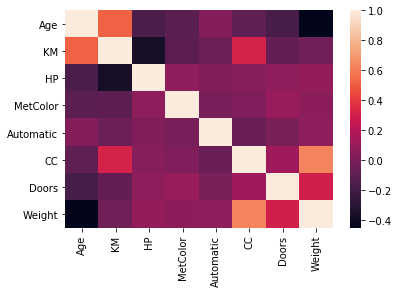

In [12]:
sns.heatmap(corr_mat)

In [13]:
columns = np.full((corr_mat.shape[0],), True, dtype=bool)
for i in range(corr_mat.shape[0]):
    for j in range(i+1, corr_mat.shape[0]):
        if corr_mat.iloc[i,j] >= 0.6:
            if columns[j]:
                columns[j] = False

In [14]:
#handel FuelType column(represent in one hot coding) and remove weigth column
dummy_fueltype = pd.get_dummies(car_data['FuelType'])
car_data = car_data.drop('FuelType',axis=1)
selected_columns = car_data.columns[columns]
car_data = pd.concat([dummy_fueltype,car_data[selected_columns]],axis=1)
car_data.head(10)

,CNG,Diesel,Petrol,Age,KM,HP,MetColor,Automatic,CC,Doors
0,0,1,0,0.278481,0.193355,0.170732,1.0,0,1.000000,3
1,0,1,0,0.278481,0.300149,0.170732,1.0,0,1.000000,3
3,0,1,0,0.316456,0.197528,0.170732,0.0,0,1.000000,3
4,0,1,0,0.367089,0.158433,0.170732,0.0,0,1.000000,3
5,0,1,0,0.392405,0.251026,0.170732,0.0,0,1.000000,3
8,0,0,1,0.329114,0.081066,1.000000,0.0,0,0.714286,3
10,0,0,1,0.303797,0.129466,1.000000,0.0,0,0.714286,3
11,0,0,1,0.265823,0.179462,1.000000,0.0,0,0.714286,3
12,0,0,1,0.303797,0.132461,1.000000,0.0,0,0.714286,3
13,0,0,1,0.379747,0.094646,1.000000,1.0,0,0.714286,3
